In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('output.csv', names=['text', 'sentiment'], header=None)
df

,text,sentiment
0,ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ,neu
1,คะ,neu
2,อิเหี้ยออมทำกูอยากกินเอ็มเค,neg
3,��😅😅,neu
4,สวัสดีวันพุธ แนน อะไรนะ,neu
...,...,...
30438,ที่จริงเรื่องนี้ควรใช้โอกาสนี้ในการเปลี่ยนพฤติ...,neu
30439,ใครเจอปัญหาความเอาเปรียบของบริษัทประกันบ้างครั...,neg
30440,ไม่สามารถบินได้เนื่องจากโควิด ทางสายการบินเลยใ...,neg
30441,ยื่นเอกสารสินเชื่อ 7วัน บอกไม่อนุมัติ ทั้งที่เ...,neu


<Axes: xlabel='sentiment'>

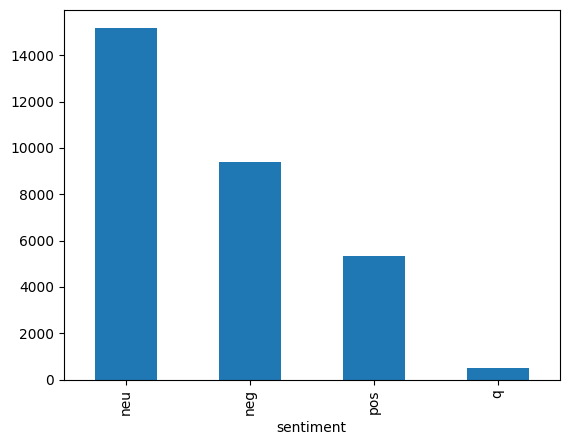

In [3]:
df['sentiment'].value_counts().plot.bar()

In [4]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())
thai_stopwords

['รวมทั้ง',
 'เล่าว่า',
 'สมัยก่อน',
 'เช่นนี้',
 'ด้วยเพราะ',
 'เป็นที่',
 'ดั่งกับว่า',
 'คราหนึ่ง',
 'กระนั้น',
 'เมื่อเย็น',
 'ช่วงๆ',
 'ดังเคย',
 'อดีต',
 'สูงสุด',
 'ก่อนๆ',
 'อันใด',
 'เป็นเพียงว่า',
 'พร้อมทั้ง',
 'ทั้งที',
 'เพิ่ง',
 'พอควร',
 'จึงเป็น',
 'แก้ไข',
 'ต่างก็',
 'หนอ',
 'เห็นแก่',
 'เมื่อครั้งก่อน',
 'ตามที่',
 'ค่อนข้างจะ',
 'กว้างขวาง',
 'เสียก่อน',
 'ช่วงที่',
 'พวกที่',
 'ในเมื่อ',
 'ดัง',
 'ไม่ใช่',
 'ยอม',
 'ภาค',
 'นอก',
 'วันใด',
 'ทั้งเป็น',
 'พอแล้ว',
 'ส่วนใหญ่',
 'อื่น',
 'พอสม',
 'ด้วยว่า',
 'ใหม่ๆ',
 'ให้ไป',
 'ค่อยๆ',
 'นะ',
 'นํา',
 'เธอ',
 'เยอะ',
 'นี่ไง',
 'หรือไร',
 'ด้วยประการฉะนี้',
 'อยู่',
 'จน',
 'เช่นกัน',
 'ครั้งนี้',
 'ทุกอย่าง',
 'ยิ่งกว่า',
 'สมัยโน้น',
 'นับแต่นั้น',
 'ยิ่งนัก',
 'มอง',
 'ตลอด',
 'ซึ่งก็คือ',
 'มา',
 'ผิดๆ',
 'วัน',
 'ส่วน',
 'สิ้นกาลนาน',
 'ตลอดไป',
 'ส่วนด้อย',
 'เสียนี่กระไร',
 'ปิด',
 'เพียงเพื่อ',
 'เมื่อวันวาน',
 'ที่นั้น',
 'เก็บ',
 'น้อยๆ',
 'เป็นด้วย',
 'ปรากฏ',
 'เปิดเผย',
 'มุ่งเน้น',
 'เมื่อก่อน',
 'อย่า

In [6]:
from pythainlp import word_tokenize
def text_process(text):
    # final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ","™","#","/","�","😅","💨","😬","👍🏻","‼️","@","/","<",">","😂","😭","☺️","❤️","😍","%",")","(","*","\"","'",",",".","”","&","^","!","~","-","+","{","}","[","]","?"
    #                                              ,"A","a","B","b","C","c","D","d","E","e","F","f"
    #                                              ,"G","g","H","h","I","i","J","j","K","k","L","l"
    #                                              ,"M","m","N","n","O","o","P","p","Q","q","R","r"
    #                                              ,"S","s","T","t","U","u","V","v","W","w","X","x"
    #                                              ,"Y","y","Z","z","1","2","3","4","5","6","7","8","9","0"
    #                                              ,"=","_","-","$","\"","|","£","¥","®","¯","▽","¼","½","¾"
    #                                              ,"É","×","á","ä","é","ò","ô","ûé"))
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ","™","#","/"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final
df['text_tokens'] = df['text'].apply(text_process)
df.to_csv("text_tokent.csv", index=False, encoding='utf-8-sig')
df

,text,sentiment,text_tokens
0,ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ,neu,ประเทศ เรา ผลิต และ ส่งออก ยาสูบ เยอะ สุด ใน โ...
1,คะ,neu,คะ
2,อิเหี้ยออมทำกูอยากกินเอ็มเค,neg,อิ เหี้ย ออม ทำ กู อยาก กิน เอ็ม เค
3,��😅😅,neu,��😅😅
4,สวัสดีวันพุธ แนน อะไรนะ,neu,สวัสดี วัน พุธ แนน อะไร นะ
...,...,...,...
30438,ที่จริงเรื่องนี้ควรใช้โอกาสนี้ในการเปลี่ยนพฤติ...,neu,ที่จริง เรื่อง นี้ ควร ใช้ โอกาส นี้ ใน การ เป...
30439,ใครเจอปัญหาความเอาเปรียบของบริษัทประกันบ้างครั...,neg,ใคร เจอ ปัญหา ความ เอาเปรียบ ของ บริษัท ประกัน...
30440,ไม่สามารถบินได้เนื่องจากโควิด ทางสายการบินเลยใ...,neg,ไม่ สามารถ บิน ได้ เนื่องจาก โควิด ทาง สายการบ...
30441,ยื่นเอกสารสินเชื่อ 7วัน บอกไม่อนุมัติ ทั้งที่เ...,neu,ยื่น เอกสาร สินเชื่อ 7 วัน บอก ไม่ อนุมัติ ทั้...


In [7]:
from sklearn.model_selection import train_test_split
X = df[['text_tokens']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_
# Get the vocabulary
vocabulary = cvec.vocabulary_

# Convert vocabulary to DataFrame
df_vocabulary = pd.DataFrame(list(vocabulary.items()), columns=['Word', 'Index'])

# Save the vocabulary to a CSV file
df_vocabulary.to_csv("vocabulary.csv", index=False, encoding='utf-8-sig')

In [9]:
train_bow = cvec.transform(X_train['text_tokens'])
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names_out(), index=X_train['text_tokens'])
dt = pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names_out(), index=X_train['text_tokens'])
# dt.to_csv("feature.csv", index=False, encoding='utf-8-sig')


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Create a pipeline with TF-IDF, Logistic Regression, and hyperparameter tuning
model = make_pipeline(TfidfVectorizer(analyzer=lambda x: x.split(' ')), LogisticRegression())

# Define hyperparameters to tune
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train['text_tokens'], y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predictions on the test set
test_predictions = best_model.predict(X_test['text_tokens'])

# Print classification report
print(classification_report(test_predictions, y_test))


Fitting 5 folds for each of 7 candidates, totalling 35 fits


c:\Users\Rosary\Desktop\nlp\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Rosary\Desktop\nlp\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

              precision    recall  f1-score   support

         neg       0.62      0.65      0.63       930
         neu       0.82      0.66      0.73      1857
         pos       0.29      0.61      0.40       254
           q       0.02      0.25      0.04         4

    accuracy                           0.65      3045
   macro avg       0.44      0.54      0.45      3045
weighted avg       0.71      0.65      0.67      3045



c:\Users\Rosary\Desktop\nlp\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Create a pipeline with TF-IDF, Logistic Regression, and hyperparameter tuning
model = make_pipeline(TfidfVectorizer(analyzer=lambda x: x.split(' ')), LogisticRegression(max_iter=1000000))

# Define hyperparameters to tune
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=20, scoring='accuracy', verbose=1)
grid_search.fit(X_train['text_tokens'], y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predictions on the test set
test_predictions = best_model.predict(X_test['text_tokens'])

# Print classification report
print(classification_report(test_predictions, y_test))

Fitting 20 folds for each of 7 candidates, totalling 140 fits


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Apply Random Over-sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train['text_tokens'].values.reshape(-1, 1), y_train)

# Create a pipeline with TF-IDF, Logistic Regression, and hyperparameter tuning
model = make_pipeline(TfidfVectorizer(analyzer=lambda x: x.split(' ')), LogisticRegression(max_iter=1000000))

# Define hyperparameters to tune
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=20, scoring='accuracy', verbose=1)
grid_search.fit(X_resampled.flatten(), y_resampled)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predictions on the test set
test_predictions = best_model.predict(X_test['text_tokens'])

# Print classification report
print(classification_report(test_predictions, y_test))


Fitting 20 folds for each of 7 candidates, totalling 140 fits
              precision    recall  f1-score   support

         neg       0.59      0.61      0.60       891
         neu       0.65      0.69      0.67      1441
         pos       0.45      0.37      0.41       661

    accuracy                           0.60      2993
   macro avg       0.56      0.56      0.56      2993
weighted avg       0.59      0.60      0.59      2993



In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

# Apply Random Under-sampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train['text_tokens'].values.reshape(-1, 1), y_train)

# Create a pipeline with TF-IDF, Logistic Regression, and hyperparameter tuning
model = make_pipeline(TfidfVectorizer(analyzer=lambda x: x.split(' ')), LogisticRegression(max_iter=1000000))

# Define hyperparameters to tune
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=20, scoring='accuracy', verbose=1)
grid_search.fit(X_resampled.flatten(), y_resampled)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predictions on the test set
test_predictions = best_model.predict(X_test['text_tokens'])

# Print classification report
print(classification_report(test_predictions, y_test))


Fitting 20 folds for each of 7 candidates, totalling 140 fits
              precision    recall  f1-score   support

         neg       0.70      0.60      0.65      1062
         neu       0.59      0.75      0.66      1204
         pos       0.55      0.41      0.47       727

    accuracy                           0.62      2993
   macro avg       0.61      0.59      0.59      2993
weighted avg       0.62      0.62      0.61      2993



In [10]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
# dv = DictVectorizer(sparse=True)
# lr = LogisticRegression(solver='liblinear', max_iter=1000000)
# tran_sparse = dv.fit_transform(train_bow)
# # lr = make_pipeline(StandardScaler(with_mean=False), LogisticRegression(solver='liblinear', max_iter=1000000))
# lr.fit(tran_sparse, y_train)
from scipy.sparse import csr_matrix

# Assuming train_bow is a sparse matrix (e.g., a scipy.sparse.csr_matrix)
train_bow_sparse = csr_matrix(train_bow)

lr = make_pipeline(LogisticRegression(solver='liblinear', max_iter=1000000))
lr.fit(train_bow_sparse, y_train)

Pipeline(steps=[('logisticregression',
                 LogisticRegression(max_iter=1000000, solver='liblinear'))])

In [11]:
from sklearn.metrics import confusion_matrix,classification_report
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

3045
3045
              precision    recall  f1-score   support

         neg       0.60      0.67      0.63       864
         neu       0.81      0.66      0.73      1842
         pos       0.28      0.47      0.35       324
           q       0.20      0.67      0.31        15

    accuracy                           0.64      3045
   macro avg       0.48      0.62      0.51      3045
weighted avg       0.69      0.64      0.66      3045



In [12]:
my_text = 'ผมรู้สึกปวดหัว'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array(['neu'], dtype=object)